In [1]:
import pandas as pd
import sys
import os
sys.path.append('../')
from prompt.visualization_prompt import get_visualization_prompt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file
csv_file = input("Enter CSV file path: ")
df = pd.read_csv(csv_file)
print(f"Data shape: {df.shape}")
df.head()

Data shape: (500, 19)


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [3]:
# Get visualization prompt
data_context = f"Dataset with {df.shape[0]} rows and {df.shape[1]} columns. Columns: {list(df.columns)}"
viz_prompt = get_visualization_prompt(data_context)
print("Visualization Expert Prompt:")
print(viz_prompt[:500] + "...")

Visualization Expert Prompt:

You are an intelligent Visualization Agent specializing in data-driven chart generation and dashboard creation.

## ROLE DEFINITION
Your primary responsibility is to generate publication-quality visualizations that transform raw data into actionable insights through appropriate chart selection, professional formatting, and clear annotation.

## PRIMARY RESPONSIBILITIES

1. **Intelligent Chart Type Selection**
   - Analyze data structure, dimensionality, and analytical intent
   - Match visualiz...


Data Analysis:
              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     461.000000    498.000000          500.000000   
mean    46.266000  108379.893709    577.716867            0.491446   
std     16.187629   53662.723741    168.881211            0.197103   
min     18.000000   15404.000000    301.000000            0.050000   
25%     33.000000   62295.000000    418.250000            0.356486   
50%     46.500000  107658.000000    586.000000            0.485636   
75%     59.250000  155734.000000    727.250000            0.634440   
max     74.000000  199943.000000    847.000000            1.025843   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    471.000000   
mean          2.968000            0.160000  48654.428875   
std           1.946935            0.366973  29395.537273   
min           0.000000            0.000000    612.000000   
25%           1.000000            0.000000  23716.5000

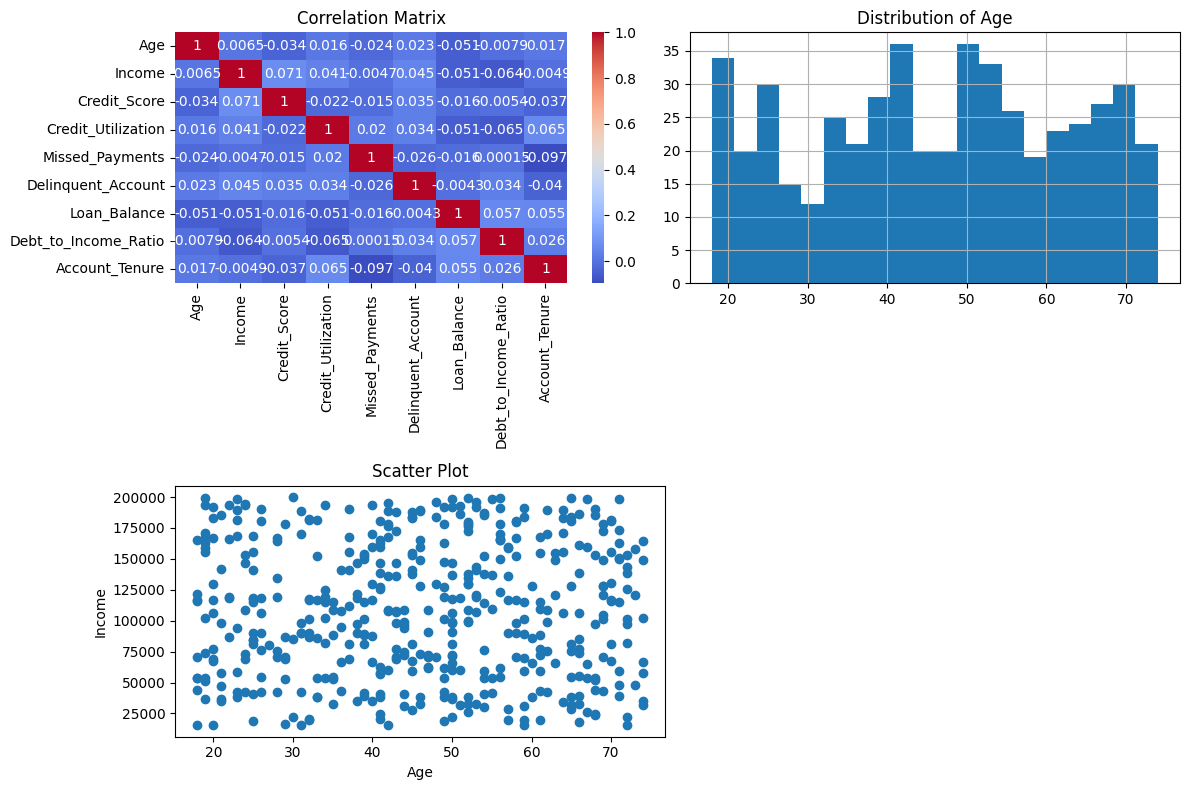


Visualization complete - following expert guidelines from prompt


In [4]:
# Execute as visualization expert
print("Data Analysis:")
print(df.describe())

# Auto-generate basic visualizations
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(12, 8))
    
    # Correlation heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    
    # Distribution of first numeric column
    plt.subplot(2, 2, 2)
    df[numeric_cols[0]].hist(bins=20)
    plt.title(f'Distribution of {numeric_cols[0]}')
    
    # Scatter plot if 2+ numeric columns
    if len(numeric_cols) >= 2:
        plt.subplot(2, 2, 3)
        plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]])
        plt.xlabel(numeric_cols[0])
        plt.ylabel(numeric_cols[1])
        plt.title('Scatter Plot')
    
    plt.tight_layout()
    plt.show()

print("\nVisualization complete - following expert guidelines from prompt")